Note: you may need to restart the kernel to use updated packages.


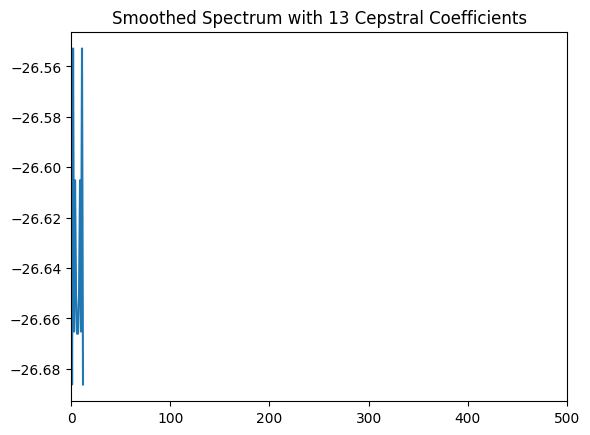

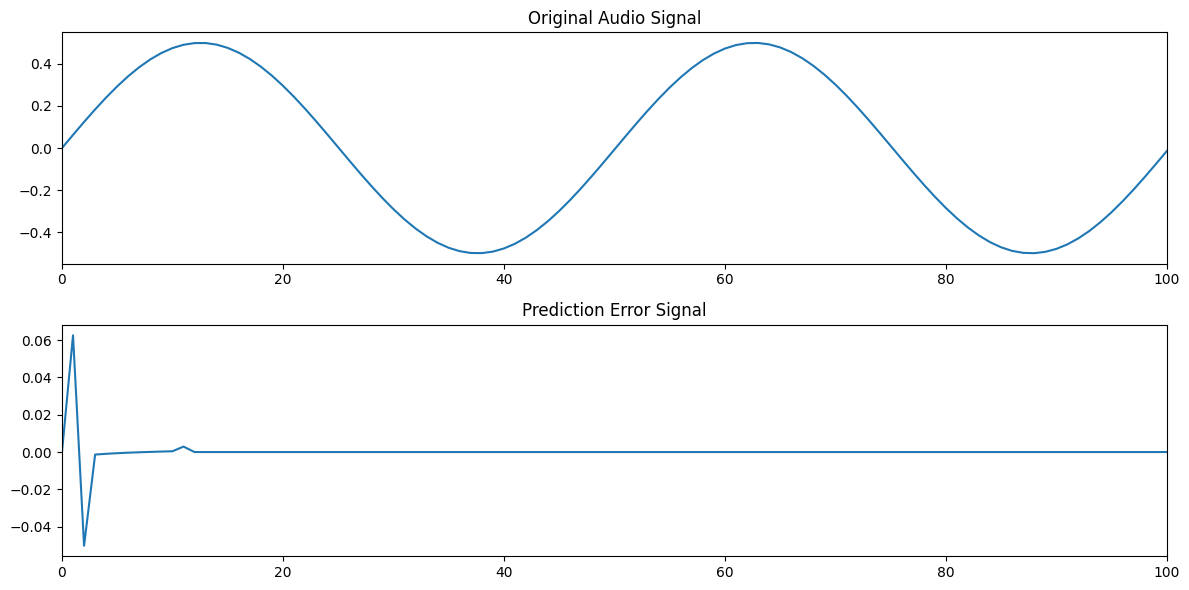

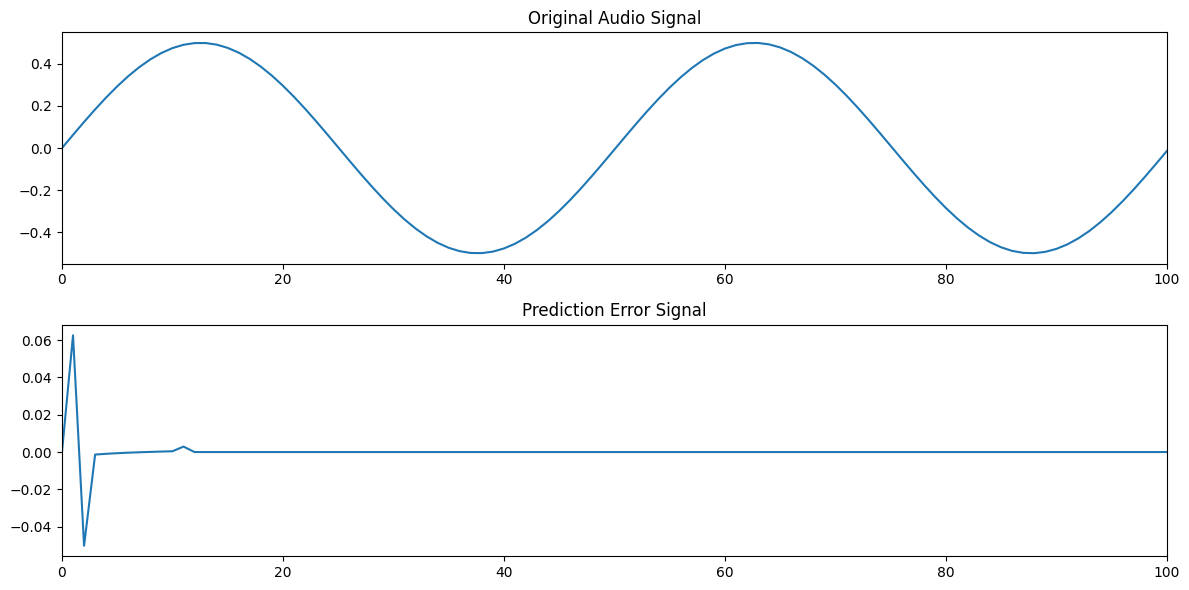

/var/folders/3p/00fys0v91nv0c3gjwlnx9np00000gn/T/ipykernel_33165/3650304973.py:49: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)


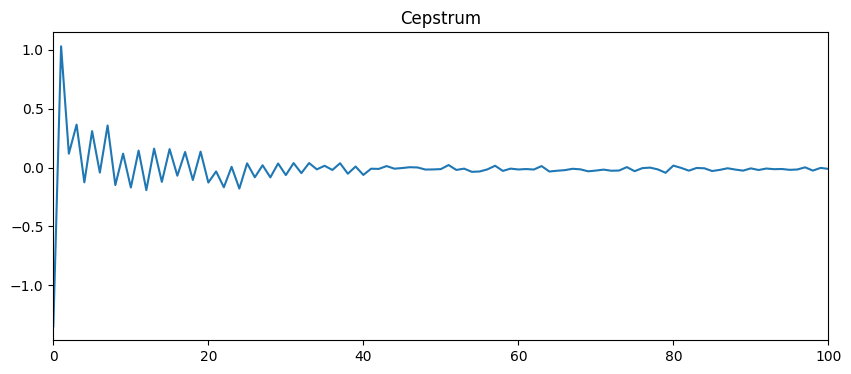

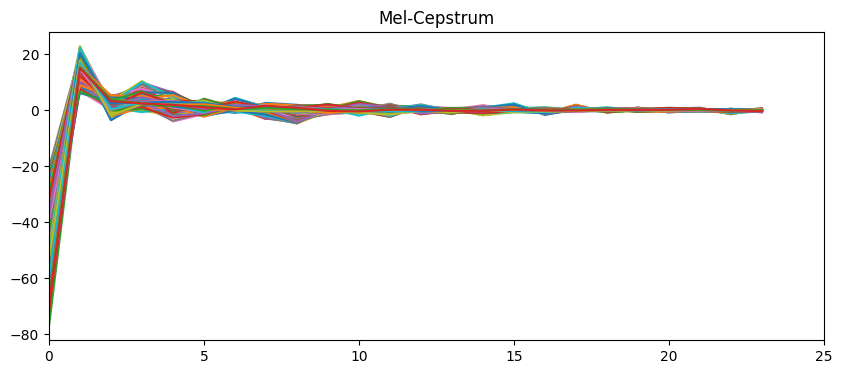

In [6]:
%pip install numpy matplotlib librosa scipy soundfile
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy
from scipy.fftpack import dct
from scipy.signal import lfilter
import soundfile as sf

# Generate a simple sine wave for testing
def generate_sine_wave(freq, duration, sr=22050):
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    audio = 0.5 * np.sin(2 * np.pi * freq * t)
    return audio, sr

# Task a: Calculate the smoothed spectrum using different numbers of cepstral coefficients
def compute_cepstrum(audio, sr, n_coeffs):
    spectrum = np.abs(np.fft.fft(audio))
    log_spectrum = np.log(spectrum)
    cepstrum = np.fft.ifft(log_spectrum).real
    smoothed_spectrum = np.fft.fft(cepstrum[:n_coeffs]).real
    return smoothed_spectrum

# Task b: LPC Analysis
def compute_lpc(audio, order):
    a = librosa.lpc(audio, order=order)
    error_signal = lfilter(a, 1, audio)
    return a, error_signal

# Task c: Plot prediction error
def plot_prediction_error(audio, error_signal, xlim_range=None):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(audio)
    plt.title('Original Audio Signal')
    if xlim_range:
        plt.xlim(xlim_range)
    plt.subplot(2, 1, 2)
    plt.plot(error_signal)
    plt.title('Prediction Error Signal')
    if xlim_range:
        plt.xlim(xlim_range)
    plt.tight_layout()
    plt.show()

# Task d: Record and analyze a spoken sentence
def record_and_analyze(audio_path, sr=22050):
    try:
        y, sr = librosa.load(audio_path, sr=sr, mono=True)
    except Exception as e:
        print(f"Error loading audio: {e}")
        return None, None, None
    cepstrum = np.fft.ifft(np.log(np.abs(np.fft.fft(y)))).real
    return y, sr, cepstrum

def plot_cepstrum(cepstrum, xlim_range=None):
    plt.figure(figsize=(10, 4))
    plt.plot(cepstrum)
    plt.title('Cepstrum')
    if xlim_range:
        plt.xlim(xlim_range)
    plt.show()

# Task e: Mel-Cepstrum
def compute_mel_cepstrum(audio, sr, n_mels=24, n_fft=2048, hop_length=512):
    # Compute the STFT
    S = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))**2
    mel_filter = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
    mel_spectrum = np.dot(mel_filter, S)
    log_mel_spectrum = np.log(mel_spectrum + 1e-9)
    mel_cepstrum = dct(log_mel_spectrum, type=2, axis=0, norm='ortho')
    return mel_cepstrum

def plot_mel_cepstrum(mel_cepstrum, xlim_range=None):
    plt.figure(figsize=(10, 4))
    plt.plot(mel_cepstrum)
    plt.title('Mel-Cepstrum')
    if xlim_range:
        plt.xlim(xlim_range)
    plt.show()

# Example usage:
# Generate a sine wave
y, sr = generate_sine_wave(freq=440, duration=2.0)

# Task a: Compute cepstrum with different coefficients
n_coeffs = 13
smoothed_spectrum = compute_cepstrum(y, sr, n_coeffs)
plt.plot(smoothed_spectrum)
plt.title(f'Smoothed Spectrum with {n_coeffs} Cepstral Coefficients')
plt.xlim(0, 500)  # Adjust the x-axis limit as needed
plt.show()

# Task b: Perform LPC Analysis
order = 12
a, error_signal = compute_lpc(y, order)
plot_prediction_error(y, error_signal, xlim_range=(0, 100))

# Task c: Plot the prediction error
plot_prediction_error(y, error_signal, xlim_range=(0, 100))

# Task d: Record and analyze a spoken sentence
# Provide the path to an actual audio file here, e.g., "audio_file.wav"
audio_path = "wetter.m4a"  # Update this with your file path
y, sr, cepstrum = record_and_analyze(audio_path)
if y is not None:
    plot_cepstrum(cepstrum, xlim_range=(0, 100))

# Task e: Compute and plot Mel-Cepstrum
mel_cepstrum = compute_mel_cepstrum(y, sr)
plot_mel_cepstrum(mel_cepstrum, xlim_range=(0, 25))


Note: you may need to restart the kernel to use updated packages.


/var/folders/3p/00fys0v91nv0c3gjwlnx9np00000gn/T/ipykernel_33165/2483321989.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=8000)


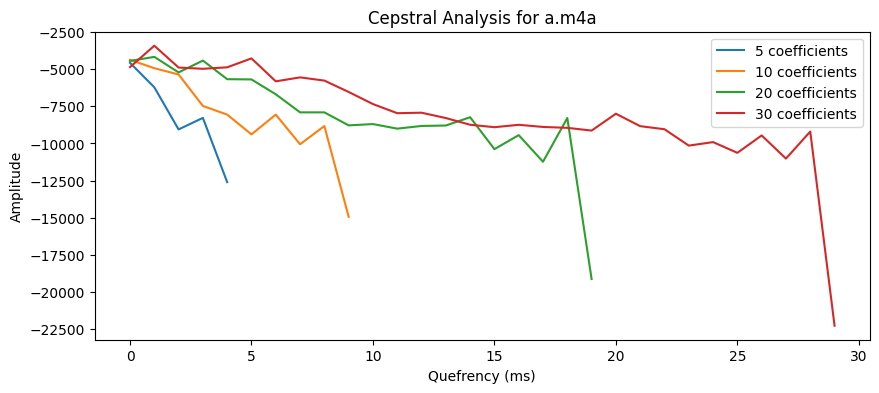

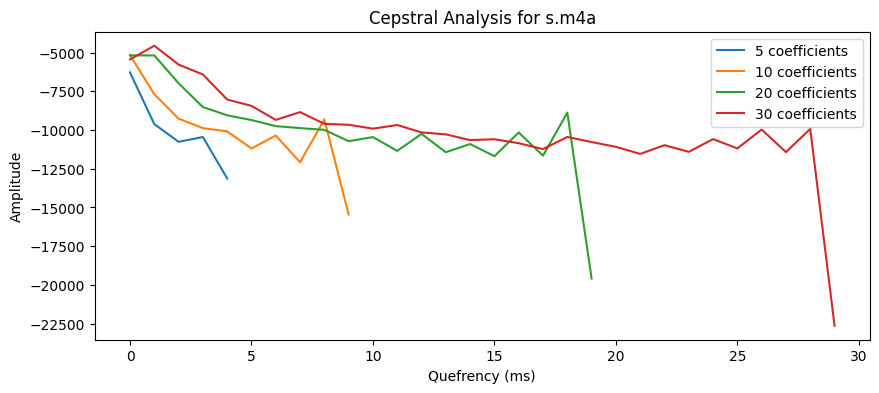

/var/folders/3p/00fys0v91nv0c3gjwlnx9np00000gn/T/ipykernel_33165/2483321989.py:54: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=8000)


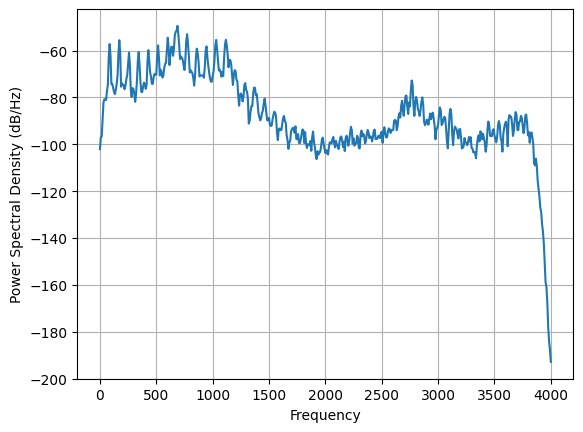

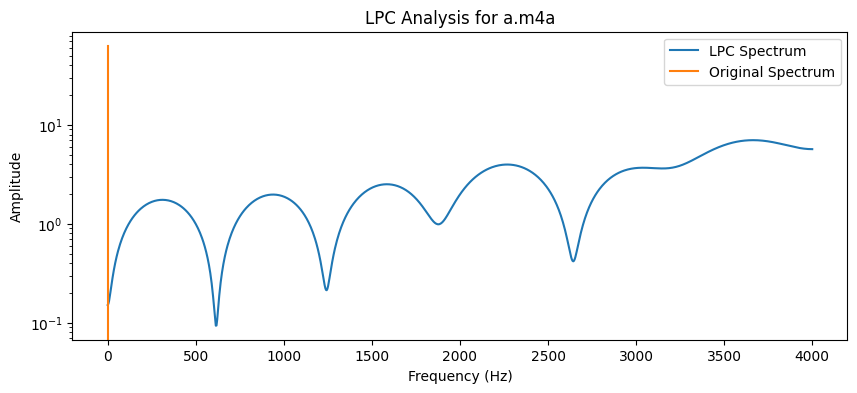

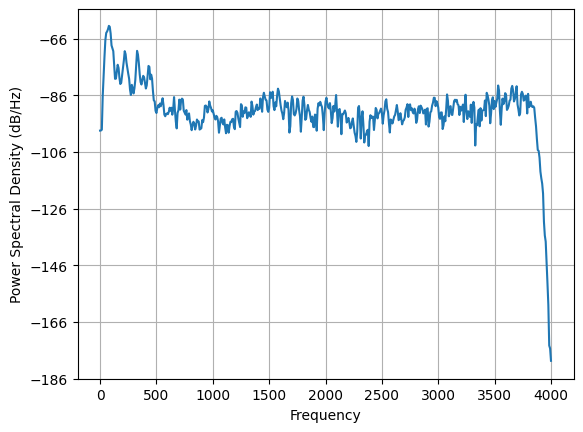

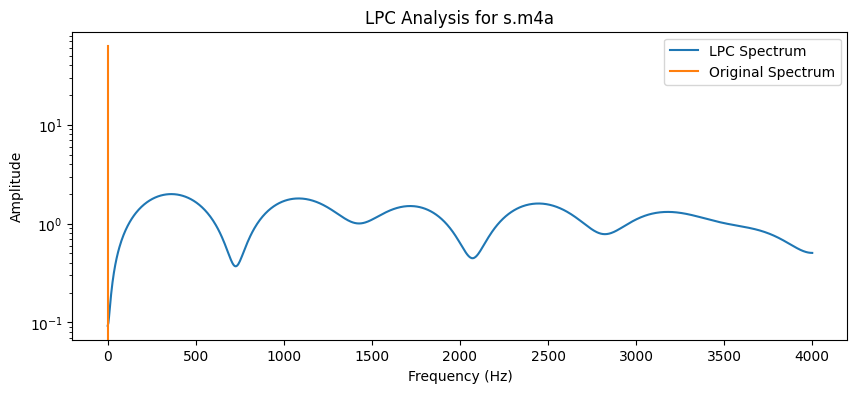

/var/folders/3p/00fys0v91nv0c3gjwlnx9np00000gn/T/ipykernel_33165/2483321989.py:75: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=8000)


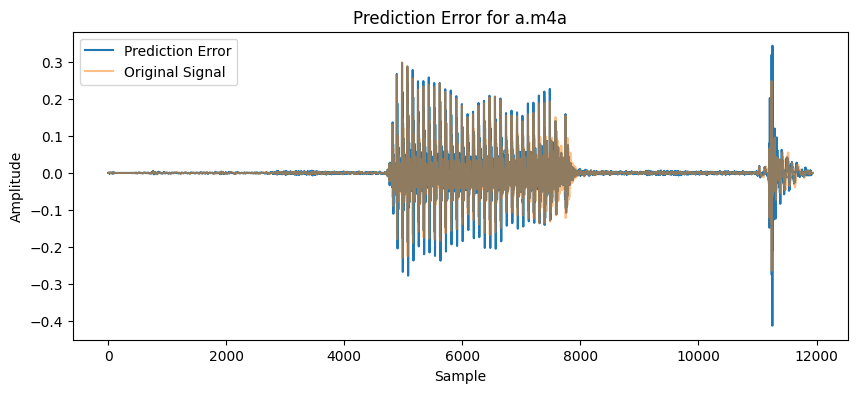

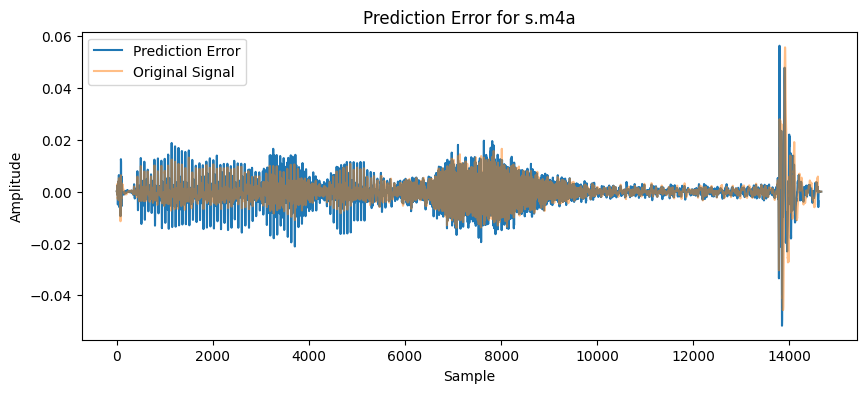

/var/folders/3p/00fys0v91nv0c3gjwlnx9np00000gn/T/ipykernel_33165/2483321989.py:94: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=8000)


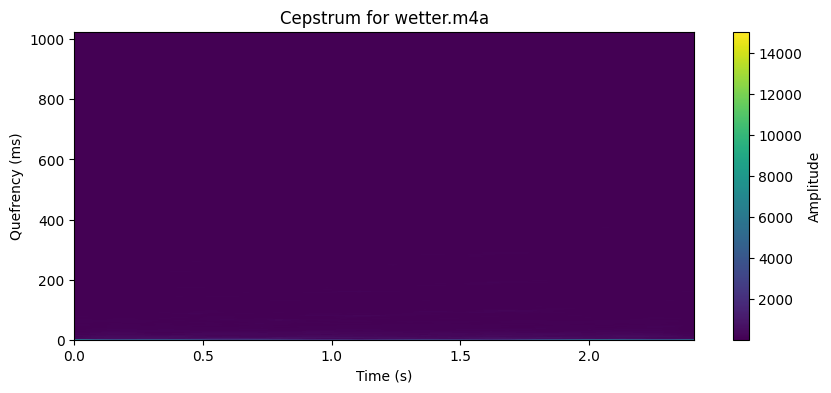

/var/folders/3p/00fys0v91nv0c3gjwlnx9np00000gn/T/ipykernel_33165/2483321989.py:112: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=8000)


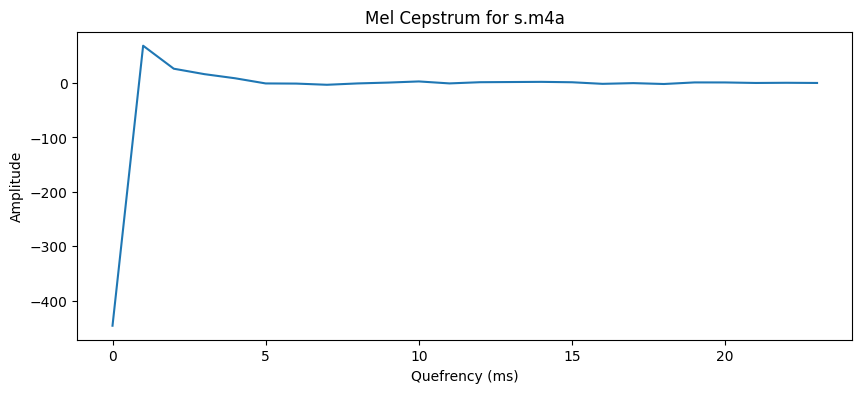

In [12]:
# Install necessary packages
%pip install numpy librosa matplotlib scikit-learn scipy

# Import necessary libraries
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from scipy.signal import lfilter
from scipy.signal.windows import hamming
from scipy.linalg import toeplitz

# Helper functions for LPC
def lpc(signal, order):
    X = np.array([signal[i: i + order] for i in range(len(signal) - order)])
    y = signal[order:]
    a = np.linalg.lstsq(X, y, rcond=None)[0]
    return np.concatenate(([1], -a))

def freqz(b, a, worN=512, fs=2*np.pi):
    w = np.linspace(0, np.pi, worN)
    h = np.exp(1j * np.outer(w, np.arange(len(a)))) @ a
    return h, w * fs / (2 * np.pi)

# Define file paths
a_file = 'a.m4a'
s_file = 's.m4a'
sentence_file = 'wetter.m4a'

# Function to extract and plot cepstral coefficients
def plot_cepstral(file_path, n_coeffs):
    y, sr = librosa.load(file_path, sr=8000)
    S = np.abs(librosa.stft(y))
    log_S = np.log(S + 1e-10)
    cepstrum = dct(log_S, axis=0)
    
    plt.figure(figsize=(10, 4))
    for n in n_coeffs:
        smoothed = idct(cepstrum[:n, :], axis=0, type=2)
        plt.plot(np.mean(smoothed, axis=1), label=f'{n} coefficients')
    plt.title(f'Cepstral Analysis for {file_path}')
    plt.xlabel('Quefrency (ms)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Plot cepstral coefficients for "a" and "s" with different numbers of coefficients
n_coeffs = [5, 10, 20, 30]
plot_cepstral(a_file, n_coeffs)
plot_cepstral(s_file, n_coeffs)

# Function to perform LPC analysis and plot the spectrum
def plot_lpc_spectrum(file_path, order):
    y, sr = librosa.load(file_path, sr=8000)
    a = lpc(y, order)
    S = np.abs(librosa.stft(y))
    f, Pxx = plt.psd(y, NFFT=1024, Fs=sr)
    H, freq = freqz(1, a, worN=1024, fs=sr)
    
    plt.figure(figsize=(10, 4))
    plt.semilogy(freq, np.abs(H), label='LPC Spectrum')
    plt.semilogy(f, np.sqrt(Pxx), label='Original Spectrum')
    plt.title(f'LPC Analysis for {file_path}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Perform LPC analysis for "a" and "s"
plot_lpc_spectrum(a_file, order=12)
plot_lpc_spectrum(s_file, order=12)

# Function to plot prediction error
def plot_prediction_error(file_path, order):
    y, sr = librosa.load(file_path, sr=8000)
    a = lpc(y, order)
    e = lfilter(a, 1, y)
    
    plt.figure(figsize=(10, 4))
    plt.plot(e, label='Prediction Error')
    plt.plot(y, alpha=0.5, label='Original Signal')
    plt.title(f'Prediction Error for {file_path}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Plot prediction error for "a" and "s"
plot_prediction_error(a_file, order=12)
plot_prediction_error(s_file, order=12)

# Function to compute and plot cepstrum for a sentence
def plot_sentence_cepstrum(file_path):
    y, sr = librosa.load(file_path, sr=8000)
    S = np.abs(librosa.stft(y))
    log_S = np.log(S + 1e-10)
    cepstrum = dct(log_S, axis=0)
    
    plt.figure(figsize=(10, 4))
    plt.imshow(np.abs(cepstrum), aspect='auto', origin='lower', extent=[0, y.shape[0] / sr, 0, cepstrum.shape[0]])
    plt.title(f'Cepstrum for {file_path}')
    plt.xlabel('Time (s)')
    plt.ylabel('Quefrency (ms)')
    plt.colorbar(label='Amplitude')
    plt.show()

# Plot cepstrum for the sentence
plot_sentence_cepstrum(sentence_file)

# Function to create a Mel filter bank and compute the Mel cepstrum
def plot_mel_cepstrum(file_path, n_filters):
    y, sr = librosa.load(file_path, sr=8000)
    n_fft = 2048  # or another value; this should match the n_fft used in librosa.stft
    S = np.abs(librosa.stft(y, n_fft=n_fft))**2
    mel_basis = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_filters)
    mel_S = np.dot(mel_basis, S)
    log_mel_S = np.log(mel_S + 1e-10)
    mel_cepstrum = dct(log_mel_S, axis=0)
    
    plt.figure(figsize=(10, 4))
    plt.plot(np.mean(mel_cepstrum, axis=1))
    plt.title(f'Mel Cepstrum for {file_path}')
    plt.xlabel('Quefrency (ms)')
    plt.ylabel('Amplitude')
    plt.show()

# Plot Mel cepstrum for "s"
plot_mel_cepstrum(s_file, n_filters=24)
